# Optimizing Slicing Numbers in OLS_slicing method
Please refer to OLS_slicing for most of the explanation.
This script basically runs OLS_slicing as a function with different slicing numbers as inputs.

In [3]:
from tools.ols import *
from matplotlib.ticker import ScalarFormatter

In [4]:
%%time 

# read run 11 data files
data_df = quick_read(11)

# name columns and add a new column - 'day'
data_df.columns = ['index','sidereal_time','phi_R','delta_f']
data_df['day'] = data_df['sidereal_time'] / (60 * 60 * 24)

CPU times: user 1min 57s, sys: 12.4 s, total: 2min 10s
Wall time: 2min 4s


# Optimizing slicing number

In [5]:
%%time

# initialization
slice_list = list(range(5,150,20))  # list for storing tempted slicing numbers 
N = len(slice_list)
co = [None] * N  # coefficient matrix to store results for each slice

for i in range(N):
    
    print(str(i+1) + ' / ' + str(N))  # display progress
    
    params = ols_slicing(data_df, slice_list[i])  # get OLS fitting parameters
    param_sum = add_params(params)  # for each parameter, sum over sliced subsets
    co[i] = cal_co(param_sum)  # calculate EMS coefficients from the summed parameter and store it in co
    
# change list to array for easy manipulation
co_ar = np.array(co)

1 / 8
2 / 8
3 / 8
4 / 8
5 / 8
6 / 8
7 / 8
8 / 8
CPU times: user 10min 15s, sys: 25.6 s, total: 10min 40s
Wall time: 10min 1s


## Table: coefficient index
Coeffients are stored in matrix *co_ar*:

|Coefficient|$c^T_Q$|$c^T_X$|$c^T_Y$|$c^T_Z$|$c^T_M$|$c^T_\_$|
|:-:|
|*index*|0|1|2|3|4|5|

use *co_ar[index]* to access each coefficient

In [6]:
co_dict = {'0': '$c^T_Q$', '1': '$c^T_X$','2': '$c^T_Y$','3': '$c^T_Z$','4': '$c^T_M$','5': '$c^T_\_$'}  # for displaying on y label

index = 0  # view different coefficient by changing the index
co_str = co_dict[str(index)]  # ylabel in latex
co_index = co_ar[:,index]  # a vector contains the selected coefficient obtained under different slice number

# since element within co_index is var class, 
# specific method is used to extract its value and standard deviation, sigma
co_value = [x.value for x in co_index]  
co_sigma = [x.sigma for x in co_index]

# Writting the selected EMS coef

In [7]:
filename = './Data/OLS_slicing_Optimization/OLS_optimize_index' + str(index) + '.txt'
write_df = pd.DataFrame({'co': co_value, 'std': co_sigma, 'N_s': slice_list})
write_df.to_csv(filename, index_label='Index')

## Visualizing $N_S$ dependent result
$N_S$ is the slicing number. We see that the fitting result is dependent on the $N_S$.

*Note: change the number of index to visualize other EMS coefficients*

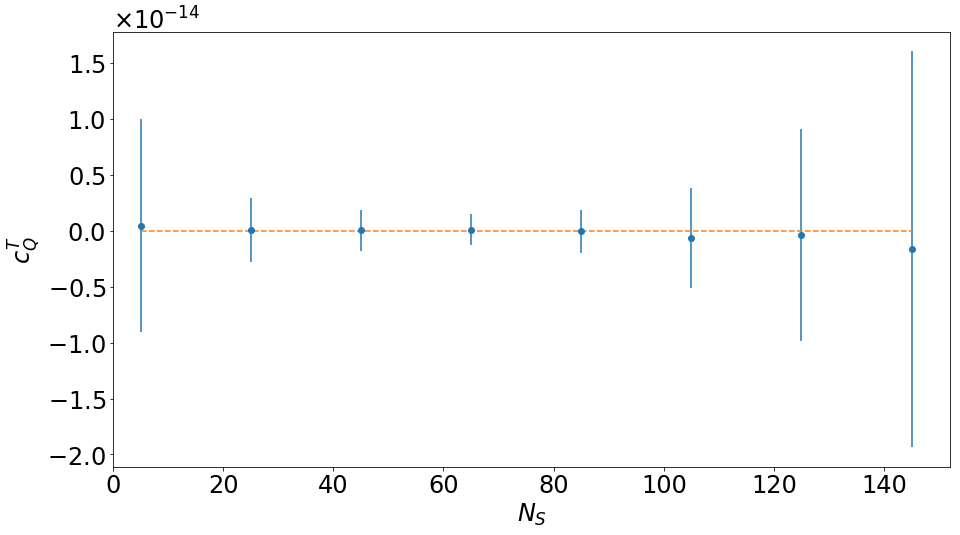

In [8]:
fig, ax = plt.subplots(figsize=(15,8))
ax.errorbar(slice_list, co_value, yerr=co_sigma, fmt='o')
ax.plot(slice_list, [0]*N, '--')  # add a zero line
ax.set_xlabel('$N_S$', fontsize=24)
ax.set_ylabel(co_str, fontsize=24)
ax.tick_params(labelsize=24)
ax.set_xlim(left=0)

# changing the format of the offset
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  
t = ax.yaxis.get_offset_text()
t.set_size(24)

plt.show()

### $\sigma$ as a function of $N_S$
We found out that the optimized $N_S$ should be around 65 for the dataset run 8&9.

Why?

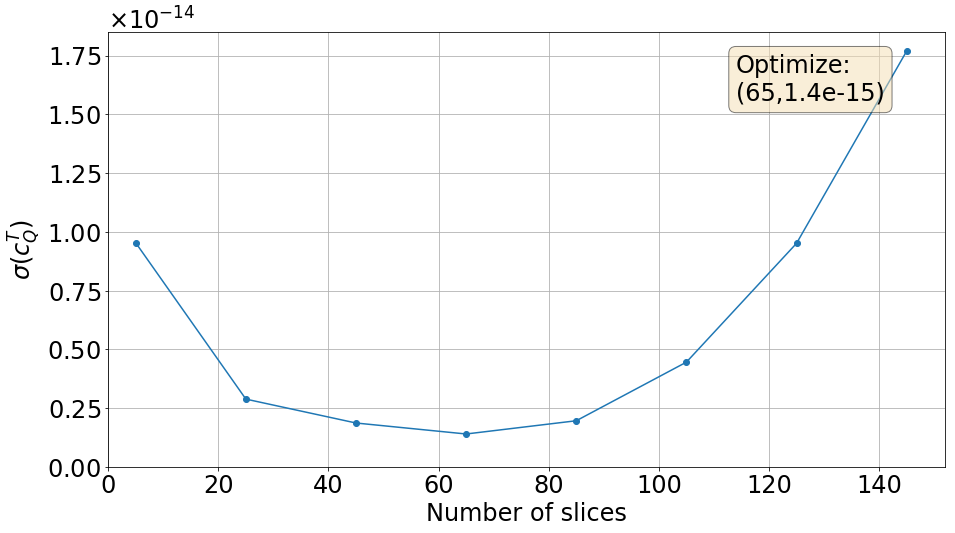

In [9]:
# calculate the min position
y_min = np.min(co_sigma)
y_min_disp = str(round(y_min,17))
x_min_index = np.argmin(co_sigma)
x_min = slice_list[x_min_index]

# plotting
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(slice_list, co_sigma, '-o')

# add text
textstr = 'Optimize:\n' + '(' + str(x_min) + ',' + str(y_min_disp) + ')'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=24,
        verticalalignment='top', bbox=props)

ax.set_xlabel('Number of slices', fontsize=24)
ax.set_ylabel('$\sigma$('+co_str+')', fontsize=24)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.tick_params(labelsize=24)

# changing the format of the offset
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  
t = ax.yaxis.get_offset_text()
t.set_size(24)

plt.grid()
plt.show()